In [1]:
"""
https://github.com/rlowd/python-bigdata/blob/master/src/main/ipynb/numerical-slides-scrubbed.ipynb
^^^ In-Class Assignment ^^^
"""
# Numerical Computing in Python

'\nhttps://github.com/rlowd/python-bigdata/blob/master/src/main/ipynb/numerical-slides-scrubbed.ipynb\n^^^ In-Class Assignment ^^^\n'

In [2]:
# Scientific Notation
print('{:.2e}'.format(48530000.0))

4.85e+07


In [10]:
# Representing Zero: zero is stored as a special-case, by
# setting significand and exponent both to zero
X = +0.0
Y = -0.0
X, Y

(0.0, -0.0)

In [11]:
# These ways of representing zero are considered equal
X == Y

True

In [1]:
# Representing infinity
x = 1e300 * 1e100
y = 1e10 * 1e10
x, y

(inf, 1e+20)

In [17]:
# Negative infinity
x > 0
y = -x
print(y)
y < x

-inf


True

In [2]:
# NaN: Not a (real) Number (these will compute infinitely)
from numpy import sqrt, inf, isnan, nan
x = sqrt(-1)

/home/lillie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
y = inf - inf

In [4]:
# Comparing 'nan' values
x == y
isnan(x)

True

In [3]:
# Vectorized Functions: functions that have been written to work
# with arrays of numbers -- 'numpy.vectorize()'
import numpy as np

def myfunc(x):
    if x >= 0.5:
        return x
    else:
        return 0.0
    
fv = np.vectorize(myfunc)

x = np.arange(0, 1, 0.1)

fv(x)

array([0. , 0. , 0. , 0. , 0. , 0.5, 0.6, 0.7, 0.8, 0.9])

In [4]:
# Populating Arrays
x = np.arange(0, 10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

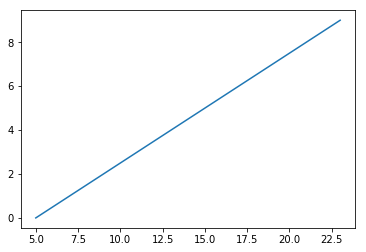

In [6]:
# Basic Plotting -- matplotlib
## Inside matplotlib is a nested module called 'pyplot'
import matplotlib.pyplot as plt
# tells Jupyter how to format plots:
%matplotlib inline

a = x * 2 + 5
plt.plot(a, x)

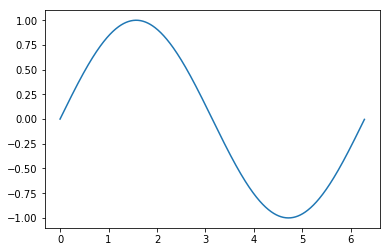

In [7]:
# Plotting a sine curve
from numpy import pi, sin

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
plt.plot(x, y)

In [8]:
# Multi-dimensional data arrays
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [11]:
# Arrays containing arrays
x[0]

array([1, 2])

In [12]:
x[1]

array([3, 4])

In [13]:
x[1][0]

3

In [15]:
# Matrices
m = np.matrix(x)
m

matrix([[1, 2],
        [3, 4]])

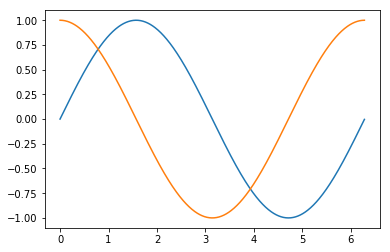

In [16]:
# Plotting multi-dimensional matrices
from numpy import cos

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
ax = plt.plot(x, np.matrix([sin(x), cos(x)]).T)

In [17]:
# Matrix operators -- 'T' (transpose ) & 'I' (inverse)
m.T

matrix([[1, 3],
        [2, 4]])

In [18]:
m.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [19]:
# Matrix dimensions
m.size

4

In [20]:
m.shape

(2, 2)

In [21]:
len(m.shape)

2

In [22]:
# Creating matrices from strings (semi-colons start a new row)
m2 = np.matrix('2 0; 0 2')
m2

matrix([[2, 0],
        [0, 2]])

In [23]:
# Matrix multiplication
m * m2

matrix([[2, 4],
        [6, 8]])

In [24]:
# Matrix indexing
m[:,1]

matrix([[2],
        [4]])

In [25]:
m[:1]

matrix([[1, 2]])

In [26]:
# Slices are references, not copies
v = m[:,1]
v

matrix([[2],
        [4]])

In [27]:
# To copy a matrix or its elements, use the 'np.copy()' function
m = np.matrix('1 2; 3 4')
v = np.copy(m[:,1])
v

array([[2],
       [4]])

In [28]:
# Sum a vector or matrix using for loops
vector = np.arange(0.0, 100.0, 10.0)
vector

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [30]:
result = 0.0
for x in vector:
    result = result + x
result

450.0

In [31]:
# A more efficient way to compute a sum is by using 'sum()'
print(np.sum(vector))

450.0


In [32]:
# Summing row and columns
matrix = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
# Sum along columns
np.sum(matrix, axis=0)

matrix([[12, 15, 18]])

In [34]:
# Sum along rows
np.sum(matrix, axis=1)

matrix([[ 6],
        [15],
        [24]])

In [35]:
# Cumulative sums
x = np.array([0, 1, 2, 3, 4])
y = np.cumsum(x)
print(y)

[ 0  1  3  6 10]


In [38]:
# Cum. sums along rows and columns
s = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(s)
print(np.cumsum(s, axis=0))
print(np.cumsum(s, axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


In [39]:
# Cumulative products
p = np.array([1, 2, 3, 4, 5])
np.cumprod(p)

array([  1,   2,   6,  24, 120])

In [40]:
# Generating (pseudo) random numbers
from numpy.random import normal, uniform, exponential, randint
epsilon = normal()
print(epsilon)

-0.5277442348809198


In [41]:
epsilon = normal()
print(epsilon)

0.3985115068405337


In [42]:
# Managing seed values & setting the seed
# 'Random' numbers rely on an initial value called the 'seed'
# If we know the seed, we can predict the rest of the sequence
# Setting the seed value lets us reliably reproduce the same sequence
# of pseudo-random numbers
from numpy.random import seed
seed(5)

In [43]:
normal()

0.44122748688504143

In [44]:
normal()

-0.33087015189408764

In [45]:
seed(5)

In [46]:
normal()

0.44122748688504143

In [47]:
normal()

-0.33087015189408764

In [48]:
# Drawing multiple variates by specifying the size
normal(size=10)

array([ 2.43077119, -0.25209213,  0.10960984,  1.58248112, -0.9092324 ,
       -0.59163666,  0.18760323, -0.32986996, -1.19276461, -0.20487651])

In [49]:
normal(size=(5,5))

array([[-0.35882895,  0.6034716 , -1.66478853, -0.70017904,  1.15139101],
       [ 1.85733101, -1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127,  0.05914424],
       [-0.36331088,  0.00328884, -0.10593044,  0.79305332, -0.63157163],
       [-0.00619491, -0.10106761, -0.05230815,  0.24921766,  0.19766009]])

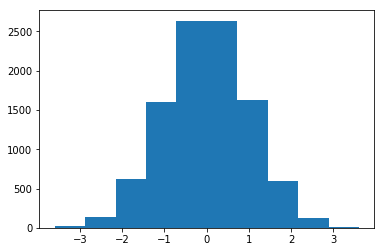

In [50]:
# Histograms
data = normal(size=10000)
ax = plt.hist(data)

In [51]:
# Summary statistics
np.mean(data)

-0.00045461080333497925

In [52]:
np.var(data)

1.0016048722546331

In [53]:
# Summary statistics with NaN values
data = np.array([1, 2, 3, 4, nan])
np.mean(data)

NameError: name 'nan' is not defined

In [54]:
# To omit values from the calculation, use 'nanmean()' or 'nanvar()'
np.nanmean(data)

-0.00045461080333497925

In [60]:
# Discrete random numbers
die_roll = randint(0, 6) + 1
die_roll

2

In [61]:
# To simulate a Bernoulli process with n = 20 trials:
bernoulli_trials = randint(0, 2, size = 20)
bernoulli_trials

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])